**Analysis of the salaries data set**

Import of Libraries:

In [1]:
# Make inline plots vector graphics
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("pdf", "svg")

# Plotting setup
import matplotlib.pyplot as plt

# Package imports
import numpy as np
import pandas as pd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

#Analysis tools
import salaries_and_world_preprocessing as pre
from sklearn.linear_model import LinearRegression


C:\Users\timwe\AppData\Local\Temp/ipykernel_3800/19607529.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("pdf", "svg")


In [2]:
world_data, salaries_data, countries_data = pre.load_data()
salaries_data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,SE,FT,Cyber Security Architect,110000,EUR,130026,NL,100,NL,L
1,2021,SE,FT,Software Engineer,50000,EUR,59102,FR,50,FR,L
2,2021,MI,FT,Front End Engineer,36000,USD,36000,AR,100,IL,S
3,2022e,SE,CT,Frontend Developer,128000,USD,128000,SK,100,US,S
4,2021,SE,FT,Web Developer,124800,USD,124800,US,100,US,L


First look at data:

In [3]:
salaries = pre.complete_preprocessing(world_data, salaries_data, countries_data)
salaries.head()


c:\Users\timwe\VisualStudio\DataLiteracy_offline\Project\salaries_and_world_preprocessing.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_data['gdp_per_capita'] = (gdp_data['gdp_md_est'] / gdp_data['pop_est'] * 1000000)


ai_or_ml_job
1.0    111065.074074
0.0    106485.517450
Name: salary_in_usd, dtype: float64

**Preprocessing of the data**

In [4]:
#Preparation for regression
salaries = salaries.dropna()
salaries = salaries[["salary_in_usd", "experience_level","work_year","company_size", "same_country","remote_ratio","gdp_company_location"]]
salaries_norm = ((salaries - salaries.mean()) /salaries.std())


In [40]:
#Calculate regression coefficients
X = salaries_norm[["experience_level","work_year","company_size", "same_country","remote_ratio","gdp_company_location"]].to_numpy()
y = salaries_norm["salary_in_usd"].values

reg = LinearRegression(fit_intercept=True).fit(X.reshape(-1,6), y)
print(reg.coef_)
r2_score = reg.score(X.reshape(-1,6), y)
print(r2_score)


[0.409108   0.01100607 0.06323389 0.11043053 0.03549663 0.40757224]
0.38512639701728424


[ 0.82724031 -1.61311861 -0.39293915 ...  0.82724031 -1.61311861
 -0.39293915]


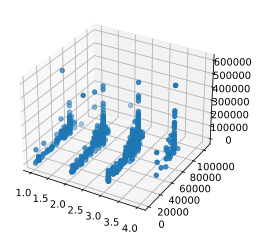

In [ ]:
#3D Plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
print(X[:,0])
ax.scatter(salaries["experience_level"], salaries["gdp_company_location"], salaries["salary_in_usd"])

In [ ]:
#Try to find best job_title predictor
#TODO Change preprocessing for ai_or_ml_job or maybe Software in preprocessing file in order
# to achieve distinguishable means which could be used as a predictor
salary_per_job = salaries[["ai_or_ml_job", "salary_in_usd"]].groupby("ai_or_ml_job").mean()
salary_per_job["salary_in_usd"].sort_values(ascending=False).head()
#plt.plot(salary_per_job.index, salary_per_job.values)

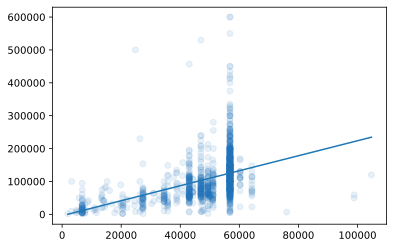

In [ ]:
#Plot linear regression of highest correlated attribute
X = salaries["gdp_company_location"].to_numpy()
y = salaries["salary_in_usd"].values
X_stacked = np.column_stack([X, np.ones_like(y)])

x_ = np.linspace(X.min(), X.max(), 100+1)

reg = LinearRegression(fit_intercept=True).fit(X.reshape(-1,1), y)
y_pred_sklearn = reg.predict(x_.reshape(-1,1))
plt.plot(x_, y_pred_sklearn)
plt.scatter(X,y, alpha=0.1)
plt.show()



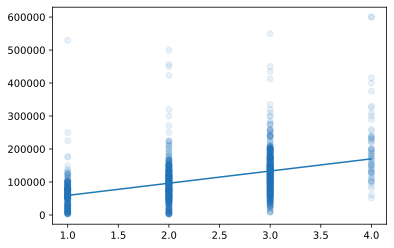

In [ ]:
#Plot linear regression of highest correlated attribute
X = salaries["experience_level"].to_numpy()
y = salaries["salary_in_usd"].values
X_stacked = np.column_stack([X, np.ones_like(y)])

x_ = np.linspace(X.min(), X.max(), 100+1)

reg = LinearRegression(fit_intercept=True).fit(X.reshape(-1,1), y)
y_pred_sklearn = reg.predict(x_.reshape(-1,1))
plt.plot(x_, y_pred_sklearn)
plt.scatter(X,y, alpha=0.1)
plt.show()
